<a href="https://colab.research.google.com/github/AlessandroMessori/ANN_Challenge_1/blob/main/ANNparteDiDavide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from PIL import Image
from tensorflow import keras

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

from google.colab import drive
drive.mount('/gdrive')

2.7.0
Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
%cd /gdrive/MyDrive/
!ls

/gdrive/MyDrive
 00.INTRODUCTION.pdf
 01.FORMAL_LANGUAGE_THEORY.pdf
 02.REGULAR_EXPRESSIONS_AND_LANGUAGES.pdf
 03.CONTEXT-FREE+GRAMMARS+-+PART+1.pdf
 04.CONTEXT-FREE+GRAMMARS+-+PART+2.pdf
 05.CONTEXT-FREE+GRAMMARS+-+PART+3.pdf
'06_ActiveDatabases_2020(2).pdf'
 06_ActiveDatabases_2020.pdf
 06.+CONTEXT-FREE+GRAMMARS+-+PART+4.pdf
 074.JPG
 075.JPG
 076.JPG
 077.JPG
 078.JPG
 079.JPG
'07. FINITE STATE AUTOMATA - PART 1.pdf'
 07.+FINITE+STATE+AUTOMATA+-+PART+1.pdf
 080.JPG
 081.JPG
'08. FINITE STATE AUTOMATA - PART 2.pdf'
 08.+FINITE+STATE+AUTOMATA+-+PART+2.pdf
'09-06-17 fine Liceo.m4a'
'09. FINITE STATE AUTOMATA - PART 3.pdf'
 09.+FINITE+STATE+AUTOMATA+-+PART+3.pdf
'10. SYNTAX ANALYSIS - PART 1.pdf'
 10.+SYNTAX+ANALYSIS+-+PART+1.pdf
'11 - Classical planning - Part 1.pdf'
 11.+SYNTAX+ANALYSIS+-+PART+2+-+LR-1.pdf
 11.+SYNTAX+ANALYSIS+-+PART+2+-+LR-1.pptx
 12.+SYNTAX+ANALYSIS+-+PART+2+-+LR-2.pptx
 13.+SYNTAX+ANALYSIS+-+PART+3+-+LL.pptx
 14.+SYNTAX+ANALYSIS+-+PART+4+-+EARLEY.pptx
 15D6FD60-AC9

In [3]:
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

In [4]:
!unzip dataset.zip

Archive:  dataset.zip
replace training/Apple/00001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
N


In [16]:
dataset_dir = 'dataset'
training_dir = os.path.join(dataset_dir, 'training')
#validation_dir = os.path.join(dataset_dir, 'validation')
#test_dir = os.path.join(dataset_dir, 'test')

In [17]:
dataset = keras.preprocessing.image_dataset_from_directory(
  'training', batch_size=64, image_size=(256, 256))

Found 17728 files belonging to 14 classes.


In [10]:
!ls training

Apple	   Cherry  Grape   Peach   Potato     Soybean  Strawberry
Blueberry  Corn    Orange  Pepper  Raspberry  Squash   Tomato


In [23]:
img_height = 256
img_width = 256
batch_size = 64

train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size = batch_size)

FileNotFoundError: ignored

In [66]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 17728 files belonging to 14 classes.
Using 3545 files for validation.


In [67]:
class_names = train_ds.class_names
print(class_names)

['Apple', 'Blueberry', 'Cherry', 'Corn', 'Grape', 'Orange', 'Peach', 'Pepper', 'Potato', 'Raspberry', 'Soybean', 'Squash', 'Strawberry', 'Tomato']


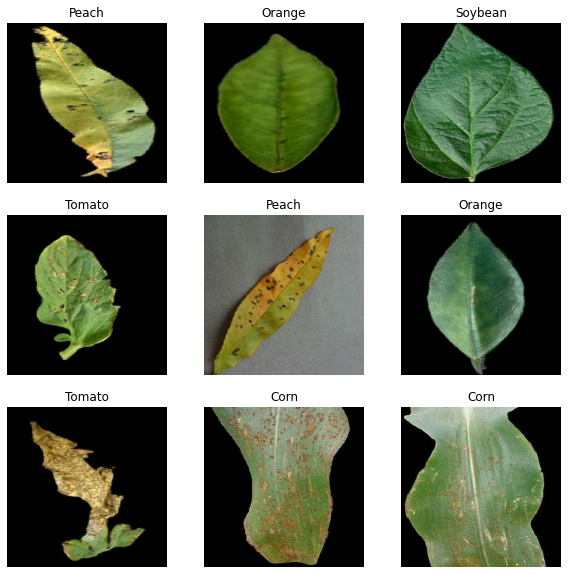

In [68]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [69]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 256, 256, 3)
(64,)


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)


In [45]:
labels = [
     'Apple',
     'Blueberry',
     'Cherry',
     'Corn',
     'Grape',
     'Orange',
     'Peach',
     'Pepper',
     'Potato',
     'Raspberry',
     'Soybean',
     'Squash',
     'Strawberry',
     'Tomato'
]

StopIteration: ignored

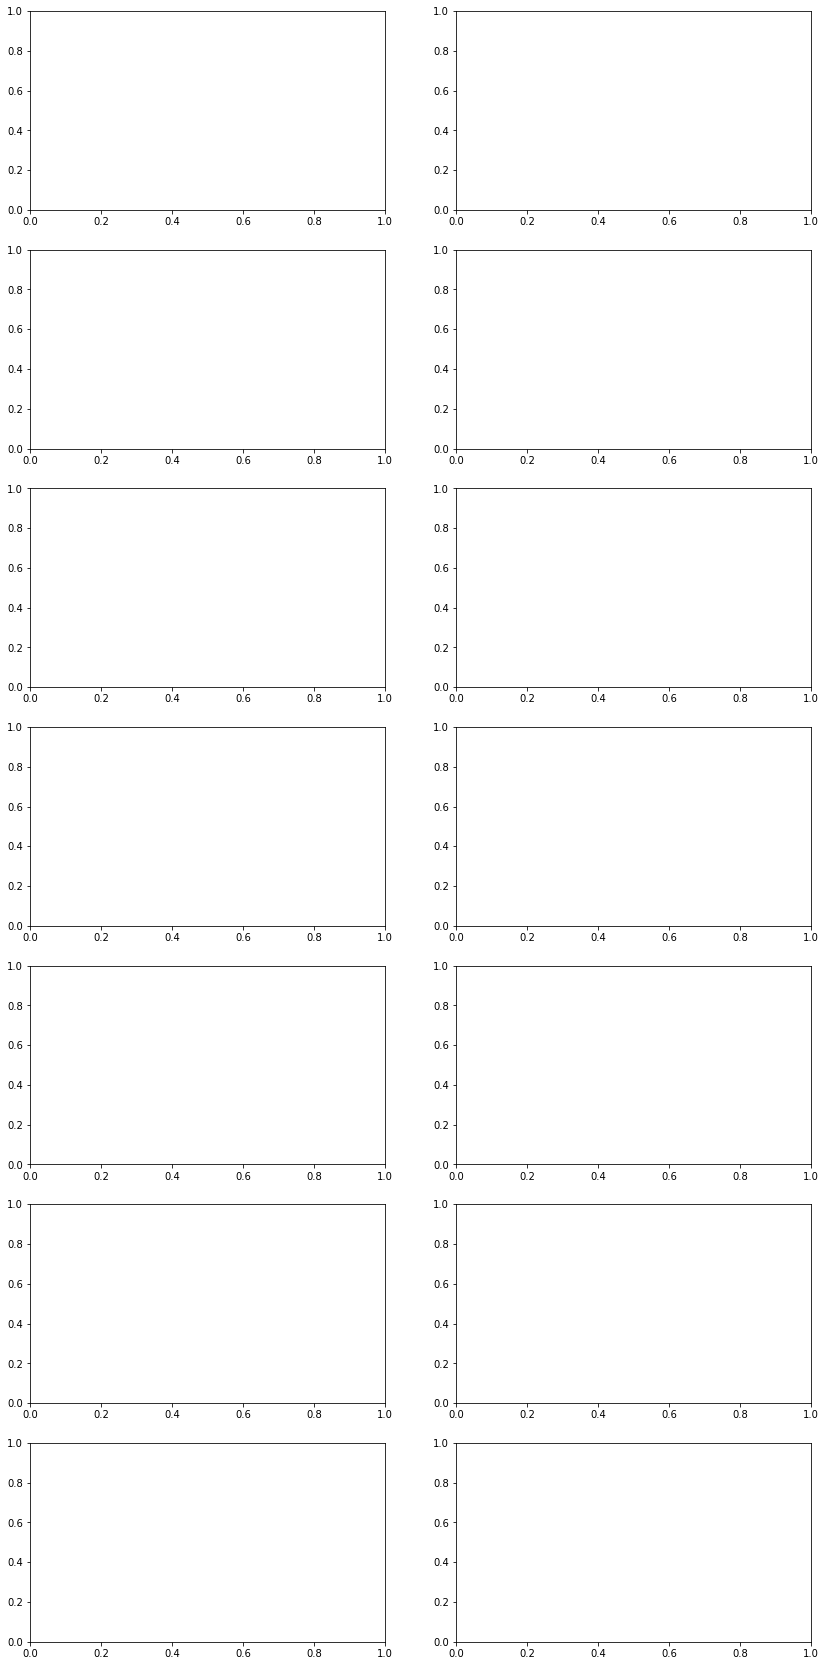

In [62]:
num_row = len(labels)//2
num_col = len(labels)//num_row

fig, axes = plt.subplots(num_row, num_col, figsize = (2*num_row, 15*num_col))

for i in range(len(labels)):
  if i < len(labels):
    class_imgs = next(os.walk('{}/'.format(training_dir, labels[i])))[1]
    class_img =  class_imgs[0]
    img = Image.open('{}/{}'.format(training_dir, labels[i], class_img))
    ax = axes[i//num_col, i%num_col]
    ax.imshow(np.array(img))
    ax.set_title('{}',format(labels[i]))

    plt.tight_layout()
    plt.show()


In [29]:
!ls dataset

ls: cannot access 'dataset': No such file or directory


In [2]:
PIL.Image.open('imgname.jpg').convert('RGB'))

img_height = 256
img_width = 256

SyntaxError: ignored